# **HR Analytics for employee retention**


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## **Reading & Exploring Dataset**

In [2]:
data=pd.read_csv("HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
# Removing extra space in the Departments variables by renaming it
data.rename(columns = {'Departments ':'Departments'}, inplace = True)

In [7]:
# Checking null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## **Exploratory Data Analysis**

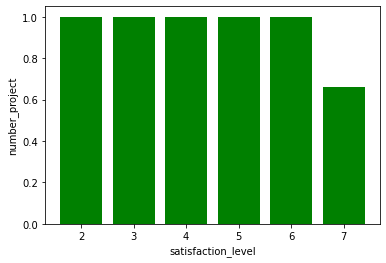

In [11]:
plt.bar(data['number_project'],data['satisfaction_level'],color='g')
plt.ylabel('number_project')
plt.xlabel('satisfaction_level')
plt.show()

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <a list of 10 Patch objects>)

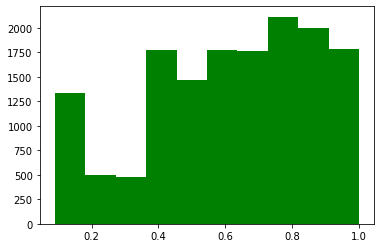

In [12]:
plt.hist(data['satisfaction_level'],color='g')

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <a list of 10 Patch objects>)

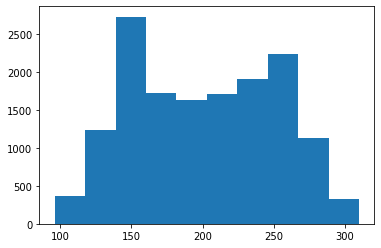

In [13]:
plt.hist(data['average_montly_hours'])


(array([ 351.,  885., 2371., 1590., 1372., 1518., 1423., 1970., 1669.,
        1850.]),
 array([0.36 , 0.424, 0.488, 0.552, 0.616, 0.68 , 0.744, 0.808, 0.872,
        0.936, 1.   ]),
 <a list of 10 Patch objects>)

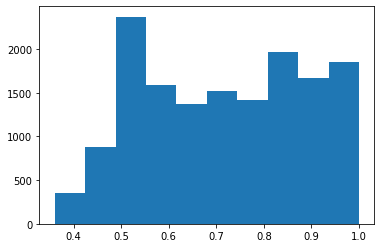

In [14]:
plt.hist(data['last_evaluation'])


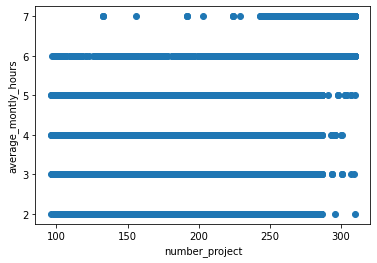

In [15]:
plt.scatter(data['average_montly_hours'],data['number_project'])
plt.ylabel('average_montly_hours')
plt.xlabel('number_project')
plt.show()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


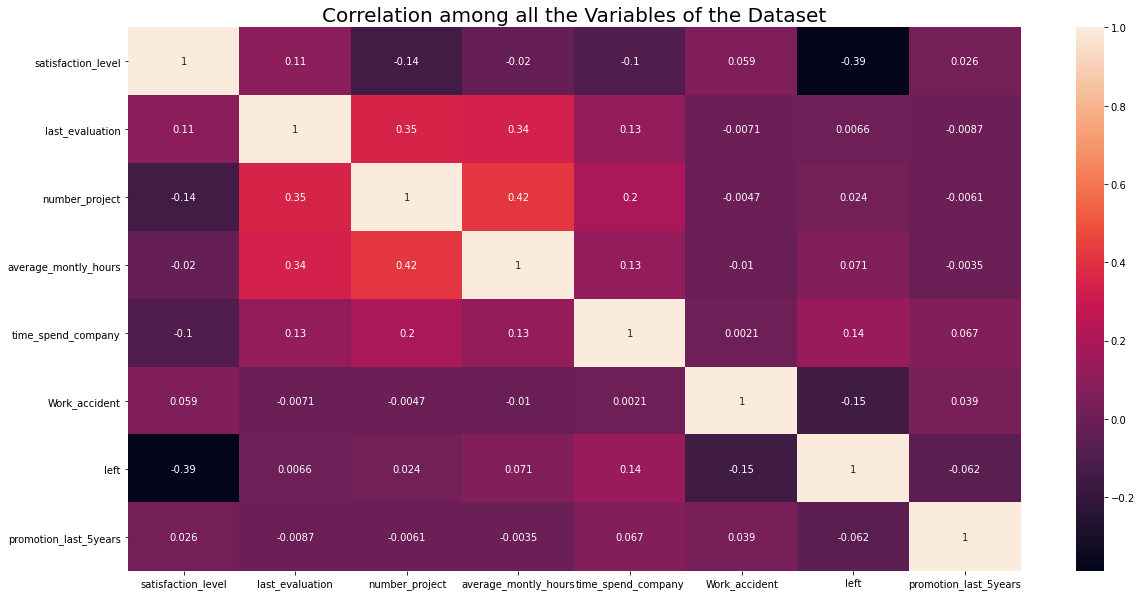

In [16]:

#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

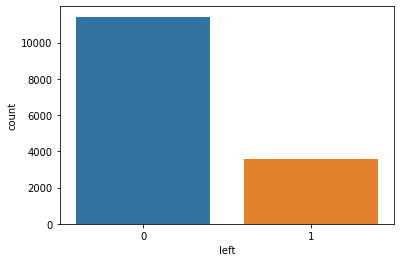

In [17]:
sns.countplot(x='left',data=data)

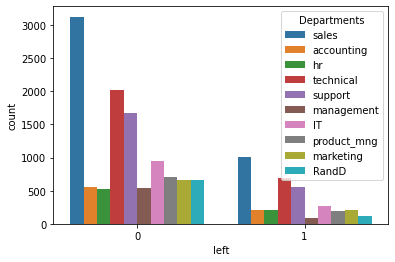

In [18]:
sns.countplot(x='left',hue='Departments',data=data)


In [19]:
not_left=data[data['left']==1]
left=data[data['left']==0]


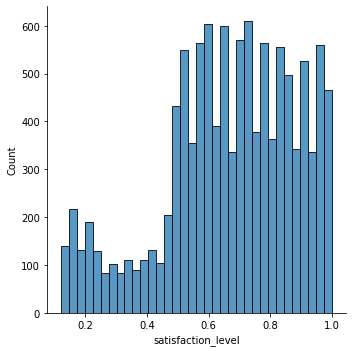

In [20]:
sns.displot(left['satisfaction_level'])


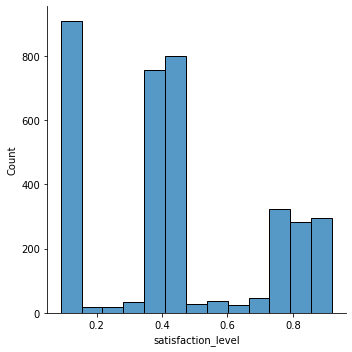

In [21]:
sns.displot(not_left['satisfaction_level'])


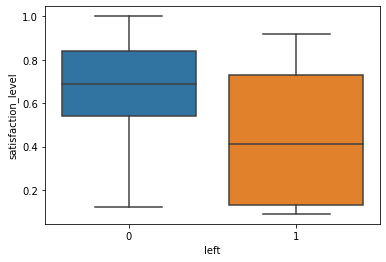

In [22]:
sns.boxplot(x='left',y='satisfaction_level',data=data)


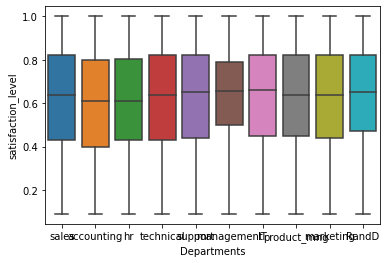

In [23]:
sns.boxplot(x='Departments',y='satisfaction_level',data=data)


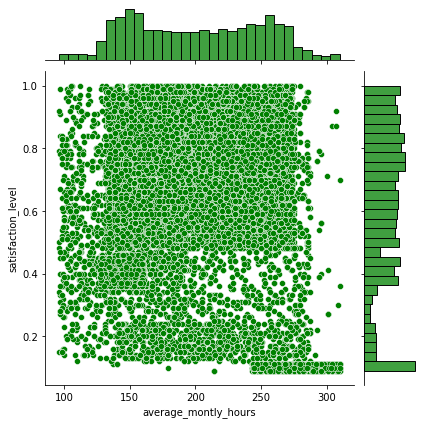

In [24]:
sns.jointplot(x='average_montly_hours',y='satisfaction_level',data=data,color='g')


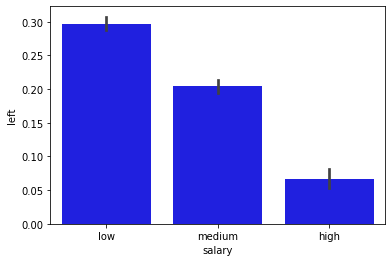

In [25]:
sns.barplot(x='salary',y='left',data=data,color='b')


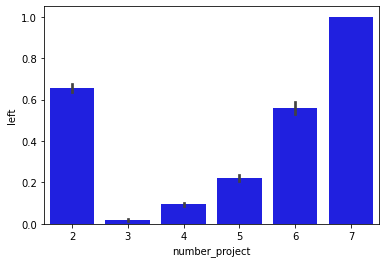

In [26]:
sns.barplot(x='number_project',y='left',data=data,color='b')


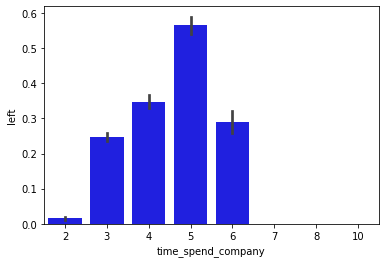

In [27]:
sns.barplot(x='time_spend_company',y='left',data=data,color='b')


In [28]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **Dealing with Categorical variables**

In [29]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [30]:
data['Departments'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [31]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [32]:
data.shape

(14999, 19)

In [33]:
clean_data=data.drop('left',axis=1)

## **Checking Multicollinearity using VIF**

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=clean_data

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,6.651212,satisfaction_level
1,21.379123,last_evaluation
2,13.990648,number_project
3,20.120382,average_montly_hours
4,6.862384,time_spend_company
5,1.174650,Work_accident
6,1.057640,promotion_last_5years
7,1.510446,Departments_RandD
8,1.483042,Departments_accounting
9,1.465988,Departments_hr


In [35]:
data_no_multicollinearity=clean_data.drop(['average_montly_hours','number_project','last_evaluation'],axis=1)


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_no_multicollinearity

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,5.693484,satisfaction_level
1,5.602176,time_spend_company
2,1.174206,Work_accident
3,1.057353,promotion_last_5years
4,1.437274,Departments_RandD
5,1.405364,Departments_accounting
6,1.401251,Departments_hr
7,1.365527,Departments_management
8,1.479558,Departments_marketing
9,1.499706,Departments_product_mng


In [37]:
data_no_multicollinearity=data.drop(['average_montly_hours','number_project','last_evaluation'],axis=1)


In [38]:
x=data_no_multicollinearity.drop('left',axis=1)
y=data_no_multicollinearity['left']


## **Feature Scaling**

In [39]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

## **Split data into training and testing**

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## **Predictive Modelling**

### **Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Logistic Regression\n")
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred)
print("\nAccuracy=",acc)


Logistic Regression

Confusion Matrix:

 [[2117  182]
 [ 520  181]]

Accuracy= 0.766


### **Decision Tree Classifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=0)
dc.fit(x_train,y_train)
y_pred2=dc.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Decision Tree Classifier\n")
cm=confusion_matrix(y_test,y_pred2)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred2)
print("\nAccuracy=",acc)

Decision Tree Classifier

Confusion Matrix:

 [[2226   73]
 [  67  634]]

Accuracy= 0.9533333333333334


### **Random Forest Classifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_pred3=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Random Forest Classifier\n")
cm=confusion_matrix(y_test,y_pred3)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred3)
print("\nAccuracy=",acc)


Random Forest Classifier

Confusion Matrix:

 [[2229   70]
 [  63  638]]

Accuracy= 0.9556666666666667


### **K Nearest Neighbor Classifier**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
y_pred4=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("K Nearest Neighbor Classifier\n")
cm=confusion_matrix(y_test,y_pred4)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred4)
print("\nAccuracy=",acc)

K Nearest Neighbor Classifier

Confusion Matrix:

 [[2191  108]
 [  68  633]]

Accuracy= 0.9413333333333334


In [45]:
error=[]
for i in range(1,60):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  Ypred_i=knn.predict(x_test)
  error.append(np.mean(Ypred_i !=y_test))

Text(0, 0.5, 'Mean Error')

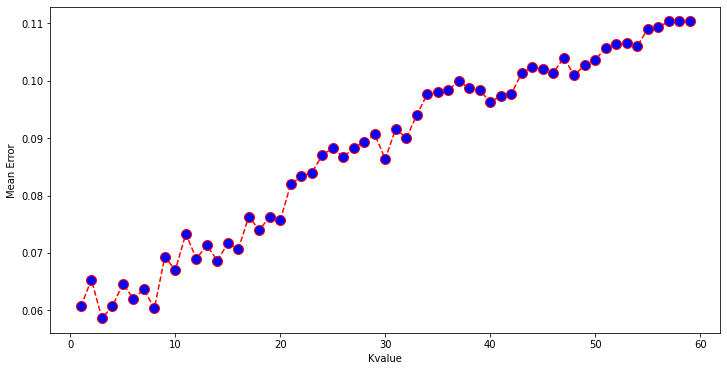

In [46]:
plt.figure(figsize=(12,6))
plt.plot(range(1,60),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('Kvalue')
plt.ylabel('Mean Error')

### **Gradient Boosting Classifier**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred5=gb.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Gradient Boosting Classifier\n")
cm=confusion_matrix(y_test,y_pred5)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred5)
print("\nAccuracy=",acc)

Gradient Boosting Classifier

Confusion Matrix:

 [[2230   69]
 [  59  642]]

Accuracy= 0.9573333333333334


### **Support Vector Classifier**

In [48]:
from sklearn.svm import SVC
sv=SVC(kernel = 'linear')
sv.fit(x_train,y_train)
y_pred6=sv.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Support Vector Classifier\n")
cm=confusion_matrix(y_test,y_pred6)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred6)
print("\nAccuracy=",acc)

Support Vector Classifier

Confusion Matrix:

 [[2135  164]
 [ 512  189]]

Accuracy= 0.7746666666666666


### **Naive Bayes Classifier**

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred7=gnb.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Naive Bayes Classifier\n")
cm=confusion_matrix(y_test,y_pred7)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred7)
print("\nAccuracy=",acc)

Naive Bayes Classifier

Confusion Matrix:

 [[1460  839]
 [ 160  541]]

Accuracy= 0.667


In [50]:
# Prediction of Gradient Boosting Model
y_pred5

array([1, 0, 0, ..., 1, 0, 0])

## **Conclusion**

Gradient Boosting Classifier is the best classification model as it gives highest accuracy among all models.